# Inference for processes far from stationarity
`pfreq` is the frequency of perturbation

../utils\plot_utils.py:50: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  matplotlib.rcParams['text.latex.preamble'] = [


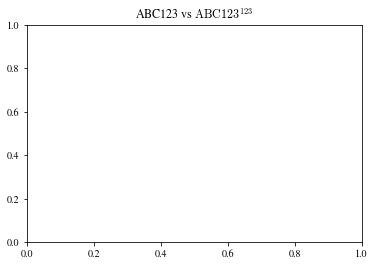

In [2]:
import sys, dill
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
sys.path.append('../utils/')
from utils import *
import time
rcPhysRev(fontsize=10)

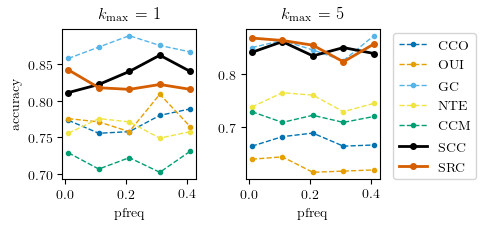

275.73226952552795


In [3]:
start = time.time()
fig, axes, legend = plot1d(nrows=1, x=Variable('pfreq', np.arange(0.01, 0.51, 0.1)), 
                           plotvars=Variable('max_lag', [1, 5]), 
                           linevars=Variable('inference_method', ['CCO','OUI','GC','NTE','CCM','SCC','SRC']),
                           num_trials=10, load=False, save=False, 
                           linecolors=[c8(1), c8(2), c8(3), c8(5), c8(6), c8(0), c8(4)], 
                           linestyles=['--', '--', '--', '--', '--', '-', '-'], linewidths=[1, 1, 1, 1, 1, 2, 2], 
                           markers=['o', 'o', 'o', 'o', 'o', 'o', 'o'], markersizes=[3, 3, 3, 3, 3, 4, 4])
# Additional formatting 
axes[0].set_title(r'$k_{\max{}}=1$')
axes[1].set_title(r'$k_{\max{}}=5$')
axes[1].set_ylabel('')
plt.tight_layout()
plt.legend(loc=(1.1, 0))
plt.show()
end = time.time()
print(end - start)

[<AxesSubplot:xlabel='pfreq', ylabel='accuracy'>
 <AxesSubplot:xlabel='pfreq', ylabel='accuracy'>
 <AxesSubplot:xlabel='pfreq', ylabel='accuracy'>]


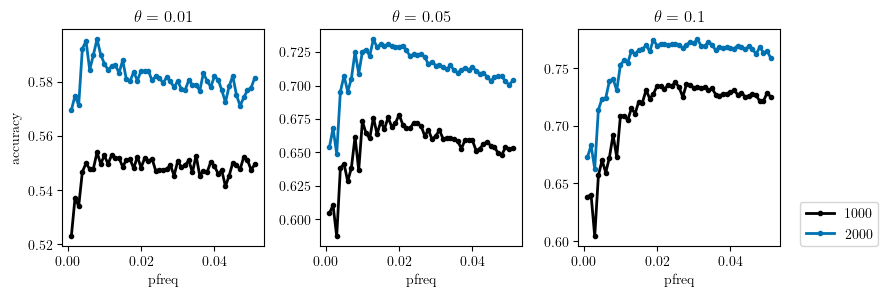

1.1533405780792236


In [11]:
t=time.time()
T = 2000
fig, axes, legend = plot1d(nrows=1, ncols=3, num_trials=500, 
    x=Variable('pfreq', (1 / T) * np.arange(1, 52, 1)), 
    plotvars=Variable('theta', [0.01, 0.05, 0.1]), 
    linevars=Variable('initial_displacement', [2, 5]),
    #linevars=Variable('T', [T, 2*T]),
    load=True, save=True, 
    markers=['o','o'],
    default_parameters={'inference_method' : 'SRC', 
                        'initial_displacement' : 2})
print(axes)
# Additional formatting 
axes[0].set_title(r'$\theta=0.01$')
axes[1].set_title(r'$\theta=0.05$')
axes[2].set_title(r'$\theta=0.1$')
axes[1].set_ylabel('')
axes[2].set_ylabel('')
plt.tight_layout()
plt.legend(loc=(1.1, 0))
plt.show()
print(time.time()-t)

[<AxesSubplot:xlabel='pfreq', ylabel='accuracy'>
 <AxesSubplot:xlabel='pfreq', ylabel='accuracy'>
 <AxesSubplot:xlabel='pfreq', ylabel='accuracy'>
 <AxesSubplot:xlabel='pfreq', ylabel='accuracy'>]


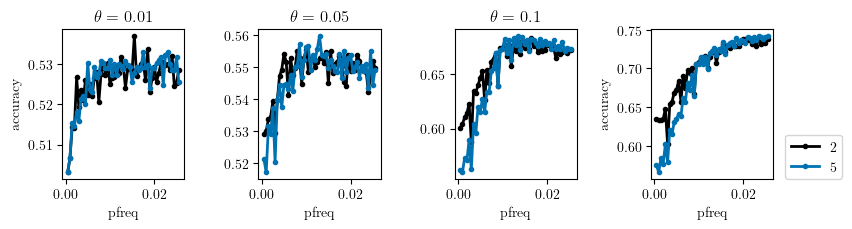

7583.384750843048


In [12]:
t=time.time()
T = 2000
fig, axes, legend = plot1d(nrows=1, ncols=4, num_trials=500, 
    x=Variable('pfreq', (1 / T) * np.arange(1, 52, 1)), 
    plotvars=Variable('theta', [0.005, 0.01, 0.05, 0.1]), 
    linevars=Variable('initial_displacement', [2, 5]),
    #linevars=Variable('T', [T, 2*T]),
    load=True, save=True, 
    markers=['o','o'],
    default_parameters={'inference_method' : 'SRC'})
print(axes)
# Additional formatting 
axes[0].set_title(r'$\theta=0.01$')
axes[1].set_title(r'$\theta=0.05$')
axes[2].set_title(r'$\theta=0.1$')
axes[3].set_title(r'$\theta=0.2$')
axes[1].set_ylabel('')
axes[2].set_ylabel('')
axes[3].set_ylabel('')

plt.tight_layout()
plt.legend(loc=(1.1, 0))
plt.show()
print(time.time()-t)

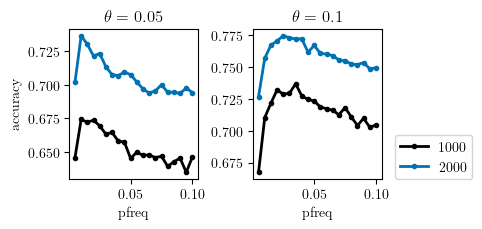

0.4328744411468506


In [9]:
t=time.time()
T = 1000
fig, axes, legend = plot1d(nrows=1, ncols=3, num_trials=500, 
    x=Variable('pfreq', (1 / T) * np.arange(5, 105, 5)), 
    plotvars=Variable('theta', [0.05, 0.1, 0.2]), 
    linevars=Variable('T', [T, 2*T]),
    load=True, save=True, 
    markers=['o','o'],
    default_parameters={'inference_method' : 'SRC', 
                        'initial_displacement' : 2})
# Additional formatting 
axes[0].set_title(r'$\theta=0.05$')
axes[1].set_title(r'$\theta=0.1$')
axes[3].set_title(r'$\theta=0.2$')
axes[1].set_ylabel('')
axes[2].set_ylabel('')
plt.tight_layout()
plt.legend(loc=(1.1, 0))
plt.show()
print(time.time()-t)

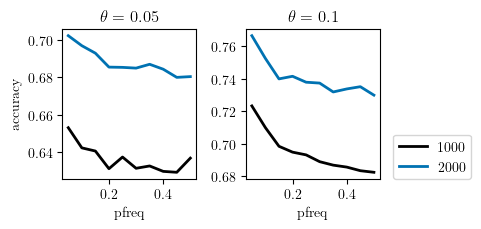

1277.8838341236115


In [6]:
t=time.time()
T = 1000
fig, axes, legend = plot1d(nrows=1, num_trials=500, 
    x=Variable('pfreq', (1 / T) * np.arange(50, 550, 50)), 
    plotvars=Variable('theta', [0.05, 0.1]), 
    linevars=Variable('T', [T, 2*T]),
    load=True, save=True, markers=['o','o'],
    default_parameters={'inference_method' : 'SRC', 
                        'initial_displacement' : 2})
# Additional formatting 
axes[0].set_title(r'$\theta=0.05$')
axes[1].set_title(r'$\theta=0.1$')
axes[1].set_ylabel('')
plt.tight_layout()
plt.legend(loc=(1.1, 0))
plt.show()
print(time.time()-t)

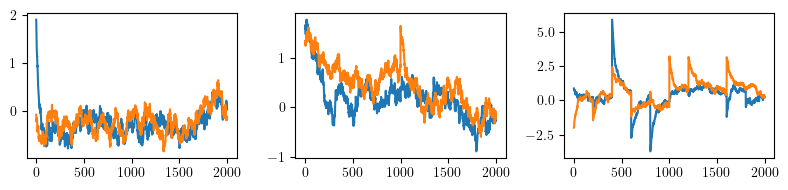

In [3]:
T = 2000
initial_displacement = 2
theta = 0.05

pfreq1 = None
pfreq2 = 2 / T
pfreq3 = 10 / T

X1 = siminf(pfreq=pfreq1, initial_displacement=initial_displacement, theta=theta, T=T)['sim'] 
X2 = siminf(pfreq=pfreq2, initial_displacement=initial_displacement, theta=theta, T=T)['sim'] 
X3 = siminf(pfreq=pfreq3, initial_displacement=initial_displacement, theta=theta, T=T)['sim'] 

plt.figure(figsize=(8, 2), dpi=100)

plt.subplot(1, 3, 1)
for i in range(2):
    plt.plot(X1[i, :])
    
plt.subplot(1, 3, 2)
for i in range(2):
    plt.plot(X2[i, :])
    
plt.subplot(1, 3, 3)
for i in range(2):
    plt.plot(X3[i, :])
    
plt.tight_layout()
plt.show()

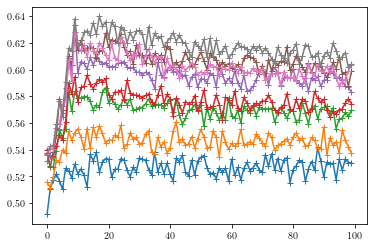

In [29]:
for i in range(1,9):
    #plt.subplot(5,2,i)
    for idis in [20]: #, 20000]:
        arr = np.load('../data/extreme_events_theta0.00'+str(i)+'_T5000_idis'+str(idis)+'.npy')
        plt.plot(np.mean(arr,axis=1), label='idis='+str(idis), marker='+')
#plt.xlim([0,30])    
#plt.subplot(212)
#for idis in [20, 20000]:
#    arr = np.load('../data/extreme_events_theta0.005_T5000_idis'+str(idis)+'.npy')
#    plt.plot(np.mean(arr,axis=1), label='idis='+str(idis))

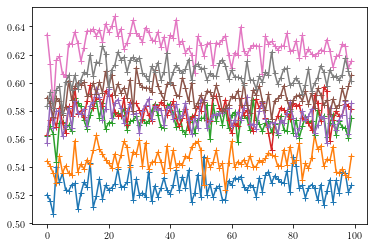

In [30]:
for i in range(1,9):
    #plt.subplot(5,2,i)
    for idis in [2]: #, 20000]:
        arr = np.load('../data/extreme_events_theta0.00'+str(i)+'_T5000_idis'+str(idis)+'.npy')
        plt.plot(np.mean(arr,axis=1), label='idis='+str(idis), marker='+')

(0.0, 20.0)

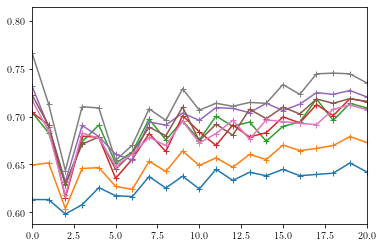

In [33]:
for i in range(1,9):
    #plt.subplot(5,2,i)
    for idis in [2]: #, 20000]:
        arr = np.load('../data/extreme_events_theta0.0'+str(i)+'_T5000_idis'+str(idis)+'.npy')
        plt.plot(np.mean(arr,axis=1), label='idis='+str(idis), marker='+')
plt.xlim([0,20])

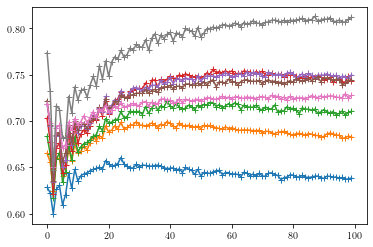

In [34]:
for i in range(1,9):
    #plt.subplot(5,2,i)
    for idis in [2]: #, 20000]:
        arr = np.load('../data/extreme_events_theta0.0'+str(i)+'_T5000_idis'+str(idis)+'.npy')
        plt.plot(np.mean(arr,axis=1), label='idis='+str(idis), marker='+')
#plt.xlim([0,20])

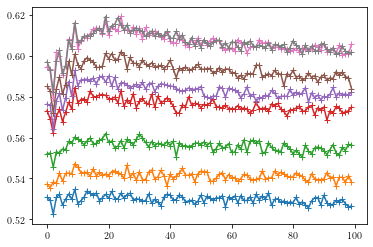

In [35]:
for i in range(1,9):
    #plt.subplot(5,2,i)
    for idis in [2]: #, 20000]:
        arr = np.load('../data/extreme_events_theta0.00'+str(i)+'_T5000_idis'+str(idis)+'.npy')
        plt.plot(np.mean(arr,axis=1), label='idis='+str(idis), marker='+')
#plt.xlim([0,20])

In [3]:
for i in range(1,9):
    #plt.subplot(5,2,i)
    for idis in [2]: #, 20000]:
        arr = np.load('../data/extreme_events_ctime'+str(i)+'_T5000_idis'+str(idis)+'.npy')
        plt.plot(np.mean(arr,axis=1), label='idis='+str(idis), marker='+')
#plt.xlim([0,20])

FileNotFoundError: [Errno 2] No such file or directory: '../data/extreme_events_ctime1_T5000_idis2.npy'